In [2]:
import pandas as pd
import glob

#1. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")

#2. Create a dictionary of DataFrames
dataframes = {file: pd.read_csv(file) for file in csv_files}

#3. Display the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())



--- wk8-products.csv ---
   product_id        product_name     category  subcategory    brand    price  \
0           1     Apple iPhone 13  Electronics  Smartphones    Apple   899.99   
1           2  Samsung Galaxy S21  electronics  Smartphones  Samsung   799.99   
2           3     Sony WH-1000XM4  ELECTRONICS   Headphones     Sony   349.99   
3           4         Dell XPS 13  Electronics      Laptops     Dell  1299.99   
4           5    Nike Classic Tee     Clothing       Shirts     Nike    24.99   

     cost  weight  
0  649.99    0.45  
1  539.99    0.50  
2  210.00    0.60  
3  899.99    2.80  
4   12.50    0.20  

--- wk8-sales.csv ---
   sale_id        date  store_id  customer_id  product_id  quantity    total  \
0        1  2022-01-15       3.0           12           5         2    49.98   
1        2  2022-01-16       1.0            5          10         1    49.99   
2        3  2022-01-18       2.0            8           3         1   349.99   
3        4  2022-01-20  

In [3]:
# See all keys (file names)
print(dataframes.keys())

dict_keys(['wk8-products.csv', 'wk8-sales.csv', 'wk8-customers.csv', 'wk8-stores.csv', 'wk8-inventory.csv'])


In [4]:
# Rename each DataFrame to an easier variable name
inventory_df = dataframes["wk8-inventory.csv"]
sales_df = dataframes["wk8-sales.csv"]
stores_df = dataframes["wk8-stores.csv"]
customers_df = dataframes["wk8-customers.csv"]
products_df = dataframes["wk8-products.csv"]

# check first rows to make sure everything loaded correctly
print(inventory_df.head())
print(sales_df.head())
print(stores_df.head())
print(customers_df.head())
print(products_df.head())

   inventory_id  store_id  product_id  quantity_in_stock last_restock_date  \
0             1         1           1                 25        2022-10-15   
1             2         1           5                 42        2022-11-02   
2             3         1          10                 18        2022-09-30   
3             4         1          15                  5        2022-10-20   
4             5         1          20                 12               NaN   

   reorder_level  
0           10.0  
1           15.0  
2            8.0  
3           10.0  
4           15.0  
   sale_id        date  store_id  customer_id  product_id  quantity    total  \
0        1  2022-01-15       3.0           12           5         2    49.98   
1        2  2022-01-16       1.0            5          10         1    49.99   
2        3  2022-01-18       2.0            8           3         1   349.99   
3        4  2022-01-20       4.0           20           7         1   349.99   
4        5  2022-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        31 non-null     int64 
 1   first_name         31 non-null     object
 2   last_name          31 non-null     object
 3   email              28 non-null     object
 4   phone              29 non-null     object
 5   address            31 non-null     object
 6   city               31 non-null     object
 7   state              31 non-null     object
 8   zip_code           30 non-null     object
 9   registration_date  28 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB


<Axes: title={'center': 'Number of Customers by State'}, xlabel='state'>

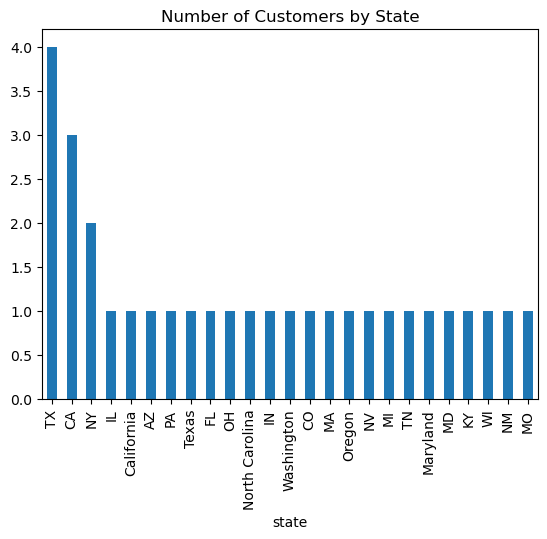

In [5]:
# Look at the customers table
customers_df.info() # shows structure of the table
customers_df.describe() # summary statistics
customers_df.isnull().sum() # missing values per column

# Plot number of customers per state
customers_df["state"].value_counts().plot(kind="bar", title="Number of Customers by State")

In [6]:
# Look at the inventory table
inventory_df.info() # shows structure of the table
inventory_df.describe() # summary statistics
inventory_df.isnull().sum() # missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_id       75 non-null     int64  
 1   store_id           75 non-null     int64  
 2   product_id         75 non-null     int64  
 3   quantity_in_stock  75 non-null     int64  
 4   last_restock_date  66 non-null     object 
 5   reorder_level      69 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.6+ KB


inventory_id         0
store_id             0
product_id           0
quantity_in_stock    0
last_restock_date    9
reorder_level        6
dtype: int64

In [7]:
# Look at the sales_df table
sales_df.info() # shows structure of the table
sales_df.describe() # summary statistics
sales_df.isnull().sum() # missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_id         40 non-null     int64  
 1   date            39 non-null     object 
 2   store_id        39 non-null     float64
 3   customer_id     40 non-null     int64  
 4   product_id      40 non-null     int64  
 5   quantity        40 non-null     int64  
 6   total           40 non-null     float64
 7   payment_method  39 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ KB


sale_id           0
date              1
store_id          1
customer_id       0
product_id        0
quantity          0
total             0
payment_method    1
dtype: int64

In [8]:
# Look at the stores table
stores_df.info() # shows structure of the table
stores_df.describe() # summary statistics
stores_df.isnull().sum() # missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      15 non-null     int64  
 1   store_name    15 non-null     object 
 2   address       15 non-null     object 
 3   city          15 non-null     object 
 4   state         15 non-null     object 
 5   zip_code      15 non-null     object 
 6   region        15 non-null     object 
 7   size_sqft     13 non-null     float64
 8   opening_date  14 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ KB


store_id        0
store_name      0
address         0
city            0
state           0
zip_code        0
region          0
size_sqft       2
opening_date    1
dtype: int64

In [9]:
# Look at the products table
# shows structure of the table
products_df.describe() # summary statistics
products_df.isnull().sum() # missing values per column

product_id      0
product_name    0
category        0
subcategory     0
brand           0
price           0
cost            0
weight          2
dtype: int64

In [10]:
## 3. Basic Information Retrieval:
## How many unique products are in the product catalog?

unique_products = products_df["product_id"].nunique()
print("Number of unique products:", unique_products)

Number of unique products: 30


In [11]:
## What are the top 5 most expensive products?

top_5_expensive = products_df.sort_values(by='price', ascending=False ).head(5)
print('Top 5 most expensive product:', top_5_expensive)



Top 5 most expensive product:     product_id        product_name        category  subcategory    brand  \
3            4         Dell XPS 13     Electronics      Laptops     Dell   
0            1     Apple iPhone 13     Electronics  Smartphones    Apple   
1            2  Samsung Galaxy S21     electronics  Smartphones  Samsung   
19          20    Dyson V11 Vacuum  HOME & KITCHEN   Appliances    Dyson   
26          27  Sony PlayStation 5     Electronics       Gaming     Sony   

      price    cost  weight  
3   1299.99  899.99    2.80  
0    899.99  649.99    0.45  
1    799.99  539.99    0.50  
19   599.99  375.00    6.70  
26   499.99  399.00    4.50  


In [12]:
# Which store has the largest floor space?
stores_df.describe()
largest_floor_space = stores_df.sort_values(by='size_sqft', ascending=False ).head(1)
print(largest_floor_space )

   store_id         store_name          address         city state zip_code  \
2         3  Los Angeles Plaza  789 Commerce St  Los Angeles    CA    90001   

  region  size_sqft opening_date  
2   West    55000.0   2004-03-10  


In [15]:
# What is the distribution of customers by state?
#customers_df["state"].value_counts().plot(kind="bar", title="Number of Customers by State")

state_distribution = customers_df["state"].value_counts()

print(state_distribution)

state
TX                4
CA                3
NY                2
IL                1
California        1
AZ                1
PA                1
Texas             1
FL                1
OH                1
North Carolina    1
IN                1
Washington        1
CO                1
MA                1
Oregon            1
NV                1
MI                1
TN                1
Maryland          1
MD                1
KY                1
WI                1
NM                1
MO                1
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

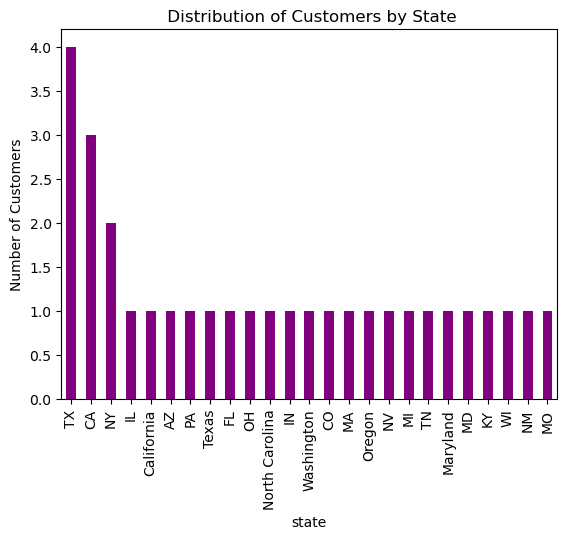

In [16]:
import matplotlib.pyplot as plt
customers_df["state"].value_counts().plot(kind="bar", color="purple", title=" Distribution of Customers by State")
plt.ylabel("Number of Customers")


In [28]:
## Part 2: Data Cleaning
#1. Handling Missing Values:
# Identify all missing values in each dataset
# For missing reorder_level fill missing values with mean value
inventory_df.describe()
mean_value = 12.681159
inventory_df['reorder_level'] = inventory_df['reorder_level'].fillna(mean_value)
inventory_df.info()
stores_df.shape
inventory_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_id       75 non-null     int64  
 1   store_id           75 non-null     int64  
 2   product_id         75 non-null     int64  
 3   quantity_in_stock  75 non-null     int64  
 4   last_restock_date  66 non-null     object 
 5   reorder_level      75 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.6+ KB


inventory_id         0
store_id             0
product_id           0
quantity_in_stock    0
last_restock_date    9
reorder_level        0
dtype: int64

In [27]:
# For size_sqft fill missing values with mean value
stores_df.describe()
mean_value = 13.00
stores_df['size_sqft'] = stores_df['size_sqft'].fillna(mean_value)
stores_df.info()
stores_df.shape
stores_df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      15 non-null     int64  
 1   store_name    15 non-null     object 
 2   address       15 non-null     object 
 3   city          15 non-null     object 
 4   state         15 non-null     object 
 5   zip_code      15 non-null     object 
 6   region        15 non-null     object 
 7   size_sqft     15 non-null     float64
 8   opening_date  14 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ KB


store_id        0
store_name      0
address         0
city            0
state           0
zip_code        0
region          0
size_sqft       0
opening_date    1
dtype: int64

In [29]:
# For missing weight fill missing values with mean_weight

products_df.describe()
mean_weight = 3.835714
products_df['weight'] = products_df['weight'].fillna(mean_weight)
products_df.info()
stores_df.shape
products_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    30 non-null     int64  
 1   product_name  30 non-null     object 
 2   category      30 non-null     object 
 3   subcategory   30 non-null     object 
 4   brand         30 non-null     object 
 5   price         30 non-null     float64
 6   cost          30 non-null     float64
 7   weight        30 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ KB


product_id      0
product_name    0
category        0
subcategory     0
brand           0
price           0
cost            0
weight          0
dtype: int64

In [24]:
sales_df.describe(include = "all")

,sale_id,date,store_id,customer_id,product_id,quantity,total,payment_method
count,40.000000,39,39.000000,40.000000,40.000000,40.000000,40.000000,40
unique,NaN,39,NaN,NaN,NaN,NaN,NaN,22
top,NaN,2022-01-15,NaN,NaN,NaN,NaN,NaN,Credit Card
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,8
mean,20.500000,NaN,6.487179,14.075000,13.500000,1.625000,352.296500,NaN
std,11.690452,NaN,4.235637,8.303189,8.857852,0.952392,377.625776,NaN
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,19.980000,NaN
25%,10.750000,NaN,3.000000,6.750000,5.750000,1.000000,99.737500,NaN
50%,20.500000,NaN,6.000000,13.500000,11.500000,1.000000,229.985000,NaN
75%,30.250000,NaN,9.500000,20.250000,21.250000,2.000000,352.487500,NaN


In [34]:
# For categorical columns with missing values, replace them with the most frequent value
# For payment_method in sales fill missing valeus with mist frequent value
frequent_value = 8
sales_df['payment_method'] = sales_df['payment_method'].fillna(frequent_value)
sales_df['store_id'] = sales_df['store_id'].fillna(-1)
sales_df.info()
stores_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_id         40 non-null     int64  
 1   date            39 non-null     object 
 2   store_id        40 non-null     float64
 3   customer_id     40 non-null     int64  
 4   product_id      40 non-null     int64  
 5   quantity        40 non-null     int64  
 6   total           40 non-null     float64
 7   payment_method  40 non-null     object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ KB


(15, 9)

In [32]:
# For missing email, phone, zip_code in customers table
customers_df['email'] = customers_df['email'].fillna('missing@email.com')
customers_df['zip_code'] = customers_df['zip_code'].fillna('00000')
customers_df['phone'] = customers_df['phone'].fillna('000 000 0000')
customers_df.info()
customers_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        31 non-null     int64 
 1   first_name         31 non-null     object
 2   last_name          31 non-null     object
 3   email              31 non-null     object
 4   phone              31 non-null     object
 5   address            31 non-null     object
 6   city               31 non-null     object
 7   state              31 non-null     object
 8   zip_code           31 non-null     object
 9   registration_date  28 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB


(31, 10)

In [38]:
# For date columns with date missing values, use forward fill or backward fill as appropriate
# I used the forward fill
customers_df['registration_date'] = customers_df['registration_date'].ffill()
inventory_df['last_restock_date'] = inventory_df['last_restock_date'].ffill()
stores_df['opening_date'] = stores_df['opening_date'].ffill()
sales_df['date'] = sales_df['date'].ffill() 
customers_df.info()
inventory_df.info()
stores_df.info()
sales_df.info()
customers_df.shape
inventory_df.shape
stores_df.shape
sales_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        31 non-null     int64 
 1   first_name         31 non-null     object
 2   last_name          31 non-null     object
 3   email              31 non-null     object
 4   phone              31 non-null     object
 5   address            31 non-null     object
 6   city               31 non-null     object
 7   state              31 non-null     object
 8   zip_code           31 non-null     object
 9   registration_date  31 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   inventory_id       75 non-null     int64  
 1   store_id           75 non-null  

(40, 8)

In [44]:
#2.Removing Duplicates:
# Check for and remove any duplicate entries in the customers and products dataframes
# Explain your approach for identifying duplicates
# Fror the duplicates, the .duplicated() function was used for the customerd and product dataframes
customers_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [45]:
products_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

#### Discussion Questions
#### 1. What are the key advantages of using Pandas for data cleaning compared to other methods? 
#### Pandas automatically aligns data based on indices, reducing errors when combining datasets.
#### 2. How would your approach to handling missing values differ if the missing data was not random but had a pattern or meaning? 
#### Fill missing values using group-based statistics for example uding the median to replace the missing data
#### 3. What types of data quality issues might not be immediately visible through simple DataFrame inspection methods? 
#### Subtle inconsistencies like different units that include date formats, capitalization in categorical variables.
#### 4. How would you document your data cleaning process to ensure reproducibility? 
#### Use notebooks or scripts with clear comments for each cleaning operation to ensure reproducibility.
#### 5. In what scenarios might it be better to remove rows with missing values rather than imputing them?
#### Removing rows might ne better if only a tiny fraction of rows is missing values, deletion may be simpler and less risky.

#### Discussion Questions
#### 1. What are the key advantages of using Pandas for data cleaning compared to other methods?
#### Pandas automatically aligns data based on indices, reducing errors when combining datasets.
#### 2. How would your approach to handling missing values differ if the missing data was not random but had a pattern or meaning?
#### Fill missing values using group-based statistics for example uding the median to replace the missing data
#### 3. What types of data quality issues might not be immediately visible through simple DataFrame inspection methods?
#### Subtle inconsistencies like different units that include date formats, capitalization in categorical variables.
#### 4. How would you document your data cleaning process to ensure reproducibility?
#### Use notebooks or scripts with clear comments for each cleaning operation to ensure reproducibility.
#### 5. In what scenarios might it be better to remove rows with missing values rather than imputing them?
#### Removing rows might ne better if only a tiny fraction of rows is missing values, deletion may be simpler and less risky.